In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset


In [2]:
merge_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how='outer')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
mice_count = (merge_df["Mouse ID"].unique())
print(mice_count)


['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

In [4]:
#NUmber of mice in the dataframe
len(mice_count)


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
len(clean_study_data_complete["Mouse ID"].unique())

248

In [8]:
#SUMMARY STATISTICS

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
StdDev = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

     #Check to make sure functions above work
print(mean,median,variance,StdDev,sem)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [10]:
#^^...Putting them together at the end
Summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Variance":variance,
                              "Tumor Standard Dev.":StdDev,
                              "Tumor Standard Error":sem})
Summary_statistics.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Standard Dev.,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
#BAR PLOTS

Text(0, 0.5, 'Number of Data Points Collected')

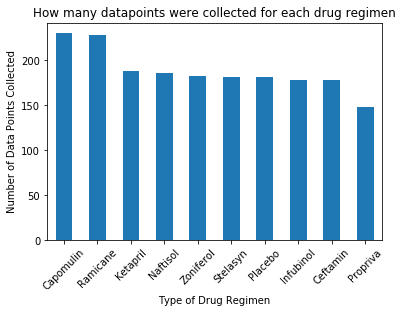

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using panda
MiceCounts = clean_study_data_complete['Drug Regimen'].value_counts()
MiceCounts.plot(kind="bar")
plt.title("How many datapoints were collected for each drug regimen")
plt.xlabel("Type of Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points Collected")




Text(0, 0.5, '# Data Points')

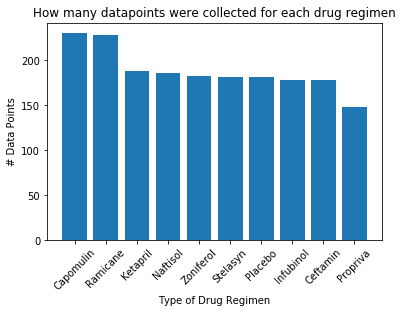

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using panda
MiceCounts = clean_study_data_complete['Drug Regimen'].value_counts()
plt.bar(MiceCounts.index.values,MiceCounts.values)
plt.title("How many datapoints were collected for each drug regimen")
plt.xlabel("Type of Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("# Data Points")





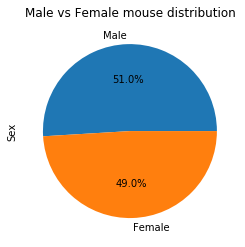

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_study_data_complete.Sex.value_counts()
mouse_gender.plot(kind="pie",autopct='%1.1f%%')
plt.title("Male vs Female mouse distribution")

plt.show()

Text(0.5, 1.0, 'Male vs Female mouse distribution')

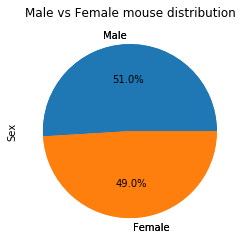

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pypl

mouse_gender.plot(kind="pie")
plt.pie(mouse_gender.values,labels=mouse_gender.index.values,autopct='%1.1f%%')
plt.title("Male vs Female mouse distribution")



In [16]:
#Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Start by getting the last (greatest per the number) timepoint for each mouse
Latest_tumor = clean_study_data_complete.groupby(["Mouse ID"]).max()
Latest_tumor = Latest_tumor.reset_index()

merged_data = Latest_tumor[['Timepoint', 'Mouse ID']].merge(clean_study_data_complete,on=['Timepoint', 'Mouse ID'],how="left")

Latest_tumor.head()
merged_data.head()




,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1


In [18]:
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",'Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane",'Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol",'Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin",'Tumor Volume (mm3)']

capomulin


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [19]:
CapomulinVOL = []
CapomulinVOL.append(capomulin)
print(CapomulineVOL)

NameError: name 'CapomulineVOL' is not defined

In [20]:
#Outliers Check

In [21]:
#Make the General Quartiles

CapQuarts = capomulin.quantile([.25,.5,.75])
RamQuarts = ramicane.quantile([.25,.5,.75])
InfQuarts = infubinol.quantile([.25,.5,.75])
CefQuarts = ceftamin.quantile([.25,.5,.75])

#Make upper quartile Variable 
CapUpperQuart = CapQuarts[.75]
RamUpperQuart = RamQuarts[.75]
InfUpperQuart = InfQuarts[.75]
CefUpperQuart = CefQuarts[.75]

#Make Lower QUartile Variable

CapLowerQuart = CapQuarts[.25]
RamLowerQuart = RamQuarts[.25]
InfLowerQuart = InfQuarts[.25]
CefLowerQuart = CefQuarts[.25]

#Make IQR Variable

CapIQR = CapUpperQuart - CapLowerQuart
RamIQR = RamUpperQuart - RamLowerQuart
InfIQR = InfUpperQuart - InfLowerQuart
CefIQR = CefUpperQuart - CefLowerQuart


#Check to make sure the various data types can compatibly work for the IQR
print(CapIQR)
print(RamIQR)
print(InfIQR)
print(CefIQR)

7.781863460000004
9.098536719999998
11.477135160000003
15.577752179999997


In [22]:
#Make the upper and lower Bounds to later check for outliers

#UpperBounds
CapUB = CapUpperQuart + (CapIQR*1.5)
RamUB = RamUpperQuart + (CapIQR*1.5)
InfUB = InfUpperQuart + (CapIQR*1.5)
CefUB = CefUpperQuart + (CapIQR*1.5)

#Lower BOunds
CapLB = CapLowerQuart-(CapIQR*1.5)
RamLB = RamLowerQuart-(CapIQR*1.5)
InfLB = InfLowerQuart-(CapIQR*1.5)
CefLB = CefLowerQuart-(CapIQR*1.5)


#Test if values are successful ?
CapUB
CapLB

CefUB
CefLB

37.04928265999999

In [38]:
Cap_outliers = capomulin.loc[(capomulin<CapLB) | (capomulin>CapUB)]

print(Cap_outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)


In [40]:
Ram_outliers = ramicane.loc[(ramicane<CapLB) | (ramicane>CapUB)]

print(Ram_outliers)


Series([], Name: Tumor Volume (mm3), dtype: float64)


In [44]:
Inf_outliers = infubinol.loc[(infubinol<CapLB) | (infubinol>CapUB)]

Inf_outliers

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
41     60.969711
50     62.435404
56     60.918767
78     67.289621
97     66.196912
101    62.117279
129    60.165180
141    55.629428
153    54.656549
170    55.650681
200    54.048608
216    58.268442
233    67.685569
245    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [45]:
Cef_outliers = ceftamin.loc[(ceftamin<CapLB) | (ceftamin>CapUB)]

print(Cap_outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)


In [28]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest

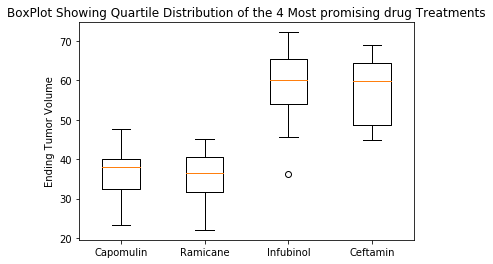

In [29]:
#BoxPlot
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Ending Tumor Volume')
plt.title("BoxPlot Showing Quartile Distribution of the 4 Most promising drug Treatments")
plt.show()

In [30]:
# Line and Scatter Plots

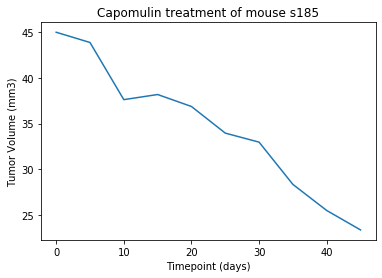

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

CapLinePlot = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
mousedata = CapLinePlot.loc[CapLinePlot['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()

In [32]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


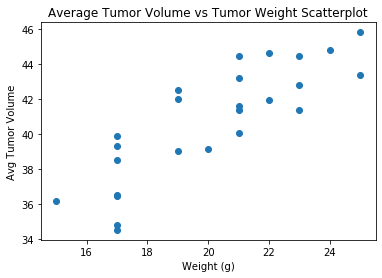

In [33]:
#SCatter Plot

#Get the DataSet Ready
CapLinePlot = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
CapMean = CapLinePlot.groupby(['Mouse ID']).mean()

#From the dataset, make the Graph
plt.scatter(CapMean['Weight (g)'],CapMean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
plt.title('Average Tumor Volume vs Tumor Weight Scatterplot')
plt.show()

In [34]:
#Correlation and Regression

In [35]:
#Correlation Value

std_err = st.linregress(CapMean['Weight (g)'], CapMean['Tumor Volume (mm3)'])
print('the correlation between Tumor Volume and Weight is',std_err[2].round(2))

the correlation between Tumor Volume and Weight is 0.84


In [36]:
#Create Regression LIne Code


values = st.linregress(CapMean['Weight (g)'],CapMean['Tumor Volume (mm3)'])
y_values = CapMean['Weight (g)']*values[0]+values[1]

#Check to make sure it works
y_values


Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

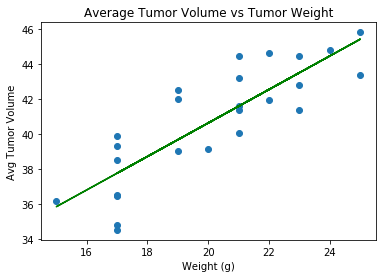

the correlation between Tumor Volume and Weight is .84


In [37]:
#Scatter Plot COde Repeated
CapLinePlot = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
CapMean = CapLinePlot.groupby(['Mouse ID']).mean()

plt.scatter(CapMean['Weight (g)'],CapMean['Tumor Volume (mm3)'])
plt.plot(CapMean['Weight (g)'],y_values,color="green")
#Regression COde Added in Directly above

plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
plt.title('Average Tumor Volume vs Tumor Weight')
plt.show()
#Scatter Plot COde Repeated

print('the correlation between Tumor Volume and Weight is .84')


